In [1]:
import nltk

In [2]:
# nltk.download()

In [4]:
from bs4 import BeautifulSoup

In [5]:
import urllib.request

In [6]:
#obtener el contenido HTML de la pagina web 
res = urllib.request.urlopen("https://librefinanciero.com")

In [7]:
#leer la informaicon obtenida, objeto HTML
html = res.read()

In [8]:
#limpiar el texto HTML capturado
soup = BeautifulSoup(html,"html5lib")

In [9]:
text = soup.get_text(strip=True)

- TOKENIZAR

In [10]:
from nltk.tokenize import word_tokenize

In [11]:
#extraer tokens
tokens = word_tokenize(text,"spanish")

In [12]:
tokens = [word.lower() for word in tokens if word.isalpha()]

In [13]:
# tokens

- FRECUENCIA DE PALABRAS

In [14]:
def frecuenciaPalabras(tokens):
    freq = nltk.FreqDist(tokens)
    for palabra,valor in freq.items():
        print(f"{palabra}: {valor}")
    return freq


In [15]:
freq = frecuenciaPalabras(tokens)

2
ven: 1
quita: 1
sirve: 3
metas: 1
par: 2
asignas: 1
antemano: 1
cantidad: 7
específica: 1
aquéllos: 2
primordiales: 1
dando: 2
intencionadamente: 1
establezco: 1
extendida: 1
destinados: 2
esenciales: 6
alquiler: 3
suministros: 1
dirigidos: 1
ocio: 6
cine: 1
comprar: 7
ropa: 5
adicional: 5
estrictamente: 2
necesaria: 3
viajes: 3
verdad: 1
partida: 3
aquéllas: 3
previamente: 4
ahorrar: 7
definir: 2
pepito: 1
ingresa: 6
mensualmente: 5
netos: 4
quiere: 3
deberían: 3
sobrepasar: 2
sumaría: 1
restantes: 2
irían: 1
sé: 1
cuáles: 3
mis: 8
hayas: 6
analizado: 1
patrón: 2
consumo: 6
sepas: 1
importe: 1
seguro: 10
refresco: 1
visitar: 2
prioridades: 3
prioridad: 3
esencialesprioridad: 1
inversiónprioridad: 1
digamos: 2
primera: 6
recortar: 1
quedando: 1
estés: 1
realizando: 1
empieces: 2
asignar: 1
después: 13
restante: 2
asocies: 1
temporal: 1
suponga: 1
partidas: 1
aplicar: 4
igual: 5
necesidades: 4
sabrás: 1
cole: 1
costará: 1
cara: 4
otro: 17
navidad: 1
mantenimiento: 1
rigidez: 1
proporc

In [16]:
import matplotlib.pyplot as plt

def vizualizarTokens(tokens):
    tokens.plot(30,cumulative=False)

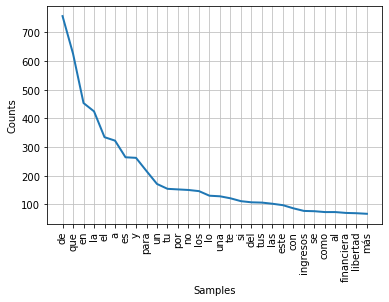

In [17]:
vizualizarTokens(freq)

- ELIMINAR PALABRAS DE PARADA

In [18]:
from nltk.corpus import stopwords

In [19]:
Tokens_limpios = tokens[:]

for token in tokens:
    if token in stopwords.words("spanish"):
        Tokens_limpios.remove(token)

In [20]:
# Tokens_limpios

In [21]:
frecuencia_limpia = frecuenciaPalabras(Tokens_limpios)

to: 22
personal: 9
mejora: 5
economíacomenzamos: 1
sumar: 3
hábito: 6
mejore: 3
enseñar: 3
crear: 11
mejorar: 9
sustancialmente: 1
primero: 3
previsión: 9
útiles: 1
utilizan: 1
niveles: 2
presupuestos: 2
empresa: 6
establecer: 1
sirva: 1
guía: 1
cumplir: 7
deseamos: 1
tratemos: 1
ceñirnos: 1
definido: 2
ven: 1
quita: 1
sirve: 3
metas: 1
par: 2
asignas: 1
antemano: 1
cantidad: 7
específica: 1
aquéllos: 2
primordiales: 1
dando: 2
intencionadamente: 1
establezco: 1
extendida: 1
destinados: 2
esenciales: 6
alquiler: 3
suministros: 1
dirigidos: 1
ocio: 6
cine: 1
comprar: 7
ropa: 5
adicional: 5
estrictamente: 2
necesaria: 3
viajes: 3
verdad: 1
partida: 3
aquéllas: 3
previamente: 4
ahorrar: 7
definir: 2
pepito: 1
ingresa: 6
mensualmente: 5
netos: 4
quiere: 3
deberían: 3
sobrepasar: 2
sumaría: 1
restantes: 2
irían: 1
sé: 1
cuáles: 3
analizado: 1
patrón: 2
consumo: 6
sepas: 1
importe: 1
seguro: 10
refresco: 1
visitar: 2
prioridades: 3
prioridad: 3
esencialesprioridad: 1
inversiónprioridad: 1
di

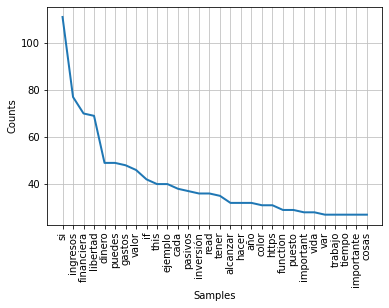

In [22]:
vizualizarTokens(frecuencia_limpia)

- DEFINICION Y EJEMPLO DE PALABRAS CON WORDNET

In [24]:
from nltk.corpus import wordnet #importa la base de datos wordnet
syn = wordnet.synsets("pain")

print(syn[0].definition())
print(syn[0].examples())

a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']


- SINONIMOS

In [26]:
# Ejemplo con la palabra "investment"
from nltk.corpus import wordnet

sinonimos = []

for syn in wordnet.synsets('investment'):#dentro de wordnet para la palabra investment
    for lemma in syn.lemmas():#extraer todos los lemas que contengan como sinonimo esa palabra
        sinonimos.append(lemma.name())
print(sinonimos)

['investing', 'investment', 'investment', 'investment_funds', 'investment', 'investment', 'investment', 'investment', 'investiture']


In [38]:
#reemplazar tokens sinonimos
#en tokens_limpios recorremos cada palabra y la reemplazamos por la palabra indicada si coincide

for ind, _ in enumerate(sinonimos):
    sin_tokens_limpios = [word.replace(sinonimos[ind],"investment") for word in Tokens_limpios]

In [39]:
# sin_tokens_limpios

- Reemplazar sinonimos Manuelamente

In [40]:
sinonimos = ["libertad","independencia"]

for ind,sin in enumerate(sinonimos):
    sin_tokens_limpios = [word.replace(sinonimos[ind],"libertad") for word in Tokens_limpios]

In [41]:
# sin_tokens_limpios

In [42]:
freq = frecuenciaPalabras(sin_tokens_limpios)

to: 22
personal: 9
mejora: 5
economíacomenzamos: 1
sumar: 3
hábito: 6
mejore: 3
enseñar: 3
crear: 11
mejorar: 9
sustancialmente: 1
primero: 3
previsión: 9
útiles: 1
utilizan: 1
niveles: 2
presupuestos: 2
empresa: 6
establecer: 1
sirva: 1
guía: 1
cumplir: 7
deseamos: 1
tratemos: 1
ceñirnos: 1
definido: 2
ven: 1
quita: 1
sirve: 3
metas: 1
par: 2
asignas: 1
antemano: 1
cantidad: 7
específica: 1
aquéllos: 2
primordiales: 1
dando: 2
intencionadamente: 1
establezco: 1
extendida: 1
destinados: 2
esenciales: 6
alquiler: 3
suministros: 1
dirigidos: 1
ocio: 6
cine: 1
comprar: 7
ropa: 5
adicional: 5
estrictamente: 2
necesaria: 3
viajes: 3
verdad: 1
partida: 3
aquéllas: 3
previamente: 4
ahorrar: 7
definir: 2
pepito: 1
ingresa: 6
mensualmente: 5
netos: 4
quiere: 3
deberían: 3
sobrepasar: 2
sumaría: 1
restantes: 2
irían: 1
sé: 1
cuáles: 3
analizado: 1
patrón: 2
consumo: 6
sepas: 1
importe: 1
seguro: 10
refresco: 1
visitar: 2
prioridades: 3
prioridad: 3
esencialesprioridad: 1
inversiónprioridad: 1
di

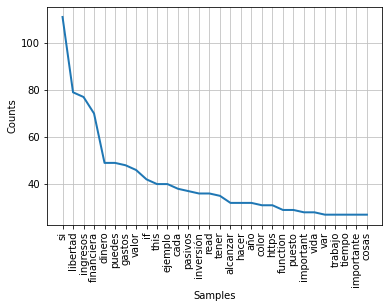

In [43]:
vizualizarTokens(freq)

- ANTONIMOS

In [51]:
from nltk.corpus import wordnet

antonyms = []

for syn in wordnet.synsets('good'):#recorra wordnet buscando la palabra 
    for l in syn.lemmas(): #asocie los lemas que tenga la palabra
  
        if l.antonyms():# si la palabra tiene antonimo
            antonyms.append(l.antonyms()[0].name())#almacenar el antonimo en el vector
print(antonyms)

['evil', 'evilness', 'bad', 'badness', 'bad', 'evil', 'ill']


- DERIVACION REGRESIVA (WORD STEMMING ) := ENCONTRAR PALABRA RAIZ

In [56]:
# algoritmo porter de derivacion regrsiva, el mas utilizado --> importar modulo porterstemmer
from nltk.stem import PorterStemmer

stemmer = PorterStemmer() # se crea un objeto de derivacion regresiva, stemmer
print(stemmer.stem('working'))

print(stemmer.stem('drinking'))

work
drink


- PorterStemmer solo esta para palabras en ingles, para palabras en español se puede utilizar SnowballStemmer

In [57]:
from nltk.stem import SnowballStemmer
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


En español

In [61]:
from nltk.stem import SnowballStemmer

stemmer_español = SnowballStemmer("spanish")#crearmos una instancia de l Snowballstemmer

print(stemmer_español.stem("trabajando"))
print(stemmer_español.stem("estudiando"))
print(stemmer_español.stem("Farriar"))

trabaj
estudi
farri


Aplicar al ejemplo

In [62]:
sin_tokens_limpios_stems = [stemmer_español.stem(token) for token in sin_tokens_limpios]

In [64]:
# sin_tokens_limpios_stems

In [65]:
freq_stems = frecuenciaPalabras(sin_tokens_limpios_stems)

background: 6
circl: 1
at: 1
color: 31
fff: 2
sol: 24
transparent: 9
hov: 23
medi: 8
scre: 3
and: 6
display: 10
non: 11
important: 28
whit: 1
li: 21
width: 5
block: 2
aut: 2
bottom: 1
top: 3
inherit: 1
libert: 79
financ: 70
context: 1
https: 31
graph: 1
type: 7
person: 32
organization: 1
id: 11
nam: 3
imag: 1
imageobject: 2
personlog: 2
inlanguag: 4
url: 8
caption: 2
log: 1
websit: 3
financier: 28
alcanz: 40
description: 2
publish: 1
potentialaction: 2
searchaction: 1
target: 2
requir: 1
primaryimag: 2
height: 2
webpag: 2
ispartof: 1
about: 1
primaryimageofpag: 1
datepublish: 1
datemodifi: 1
ten: 38
vid: 28
des: 5
pued: 84
blog: 15
readaction: 1
dzgizzg: 1
var: 27
tru: 5
disablestr: 5
function: 29
to: 4
detect: 2
opted: 1
out: 3
users: 1
return: 14
disabl: 1
tracking: 1
if: 42
the: 5
cooki: 6
exists: 1
window: 7
dec: 28
utc: 1
typeof: 4
gaoptout: 2
i: 18
s: 4
g: 1
r: 7
m: 2
arguments: 3
new: 2
dat: 14
document: 4
else: 8
noopfn: 5
null: 5
noopnullfn: 2
track: 2
p: 2
len: 2
f: 3
running

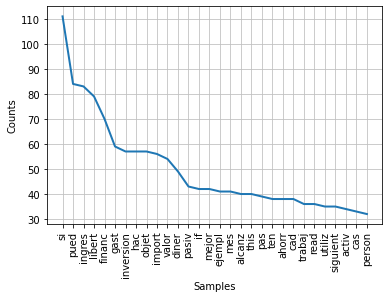

In [66]:
vizualizarTokens(freq_stems)

- LEMATIZAR PALABRAS

In [67]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

print(lemmtizer.lemmatize("increases"))

increase


In [69]:
print(lemmtizer.lemmatize("working",pos="v"))
#sustantivos de manera predeterminada, especificar 'v'  si se quieren los verbos

work


LEMATIZAR EN ESPAÑOL . INTALAR SPACY Y PAQUETES DE IDIOMAS

In [70]:
# Utilizar solo los tokens limpios, no solo con las raices (paso alternativo)
#tenemos que darle todas los tokens que tenemos en un string -> juntar en una cadena 
#separador.join(sin_tokens_limpio)

import spacy
import es_core_news_sm

nlp = es_core_news_sm.load()#instancia

sin_tokens_limpios_lem = []

separador = " "
cadena = (separador.join(sin_tokens_limpios))#string


In [72]:
# cadena

In [74]:
cadena2 = nlp(cadena)

for token in cadena2:
    print(token.text,token.lemma_,token.pos_)# token, lema, indicador
    sin_tokens_limpios_lem.append(token.lemma_)# le añadimos cada uno de los lemas a la lista

e ADJ
vídeo vídeo NOUN
canal canal PROPN
postsitem postsitem ADJ
fin fin INTJ
libertad libertar NOUN
financiera financiero ADJ
july july VERB
viviendo vivir VERB
tiempos tiempo NOUN
complicados complicar ADJ
debido deber ADP
pandemia pandemia NOUN
generada generar ADJ
puesto poner INTJ
jaque jaque NOUN
read read PROPN
caminos camino NOUN
alcanzar alcanzar VERB
libertad libertar NOUN
financiera financiero ADJ
triángulo triángulo NOUN
dinerofebruary dinerofebruary PROPN
seguido seguir ADJ
blog blog PROPN
sabes saber VERB
clave clavar NOUN
alcanzar alcanzar VERB
libertad libertar NOUN
financiera financiero ADJ
tasa tasar VERB
ahorro ahorrar NOUN
solo solo ADJ
read read PROPN
morecrea morecrea PROPN
presupuesto presupuestar PROPN
personal personal ADJ
mejora mejorar NOUN
economíajanuary economíajanuary ADJ
año año NOUN
mejor mejor ADJ
época época NOUN
año año NOUN
sumar sumar VERB
nuevo nuevo ADJ
hábito hábito NOUN
mejore mejorar PROPN
finanzas finanzas PROPN
post post PROPN
voy ir PROPN
r

In [75]:
freq_lem = frecuenciaPalabras(sin_tokens_limpios_lem)


o: 56
mejor: 23
caso: 2
si: 111
respuesta: 5
entonces: 8
contrario: 6
bienvenido: 1
comunidadlibrefinancierodonde: 1
aprender: 12
cómo: 12
ponerla: 1
significar: 8
estable: 3
hacerse: 1
rico: 1
situación: 15
quenodependas: 1
intercambiar: 4
tiempo: 32
dinero: 49
sino: 13
cubrir: 9
estilar: 3
esperar: 13
cambiar: 12
probablemente: 6
hacer: 69
ajustar: 2
aprovechar: 11
realmente: 15
importar: 19
lugar: 11
inconscientemente: 1
mayoría: 3
personar: 31
país: 8
avanzar: 1
importante: 32
entender: 1
obtener: 23
financieranodepende: 1
profesión: 1
tasar: 24
ahorrar: 32
diferenciar: 6
demostrar: 2
objetivar: 19
tratar: 6
venderte: 1
compartir: 3
información: 7
salir: 5
esclavitud: 1
siglo: 1
xxi: 1
dejar: 14
depender: 4
querer: 24
técnico: 8
círculo: 4
olvidar: 2
consumir: 9
sumar: 6
desplazamiento: 1
hacia: 12
desconectar: 5
llegar: 12
caminar: 19
sencillo: 4
ninguno: 9
panacea: 1
decir: 36
mentir: 1
consistencia: 1
claro: 5
llamar: 1
carrera: 3
rata: 3
realimentar: 1
vicioso: 1
sumergir: 1
so

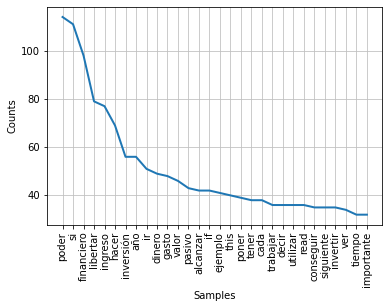

In [76]:
vizualizarTokens(freq_lem)